## Using ANN on TitanicSurvivalData

In [2]:
# Reading the cleaned numeric car prices data
import pandas as pd
import numpy as np

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

TitanicSurvivalDataNumeric=pd.read_pickle('E:/Work/Jobathon/TitanicSurvivalDataNumeric.pkl')
TitanicSurvivalDataNumeric.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,1,1,0,7.2500,0,0,1,0
1,1,0,1,0,71.2833,1,0,0,1
2,3,0,0,0,7.9250,0,0,1,1
3,1,0,1,0,53.1000,0,0,1,1
4,3,1,0,0,8.0500,0,0,1,0


In [3]:
TitanicSurvivalDataNumeric.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Survived'],
      dtype='object')

## Splitting the Data into Training and Testing

In [5]:
# After Standardization of data
# Separate Target Variable and Predictor Variables
TargetVariable=['Survived']
Predictors=['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S']

X=TitanicSurvivalDataNumeric[Predictors].values
y=TitanicSurvivalDataNumeric[TargetVariable].values


### Sandardization of data ###
### We does not standardize the Target variable for classification
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(623, 8)
(623, 1)
(268, 8)
(268, 1)


In [7]:
# Standardized predictors
X[0:3]

array([[ 0.82737724,  0.73769513,  0.43279337, -0.47367361, -0.5577766 ,
        -0.48204268, -0.30756234,  0.61583843],
       [-1.56610693, -1.35557354,  0.43279337, -0.47367361,  0.9233222 ,
         2.0745051 , -0.30756234, -1.62380254],
       [ 0.82737724, -1.35557354, -0.4745452 , -0.47367361, -0.54216376,
        -0.48204268, -0.30756234,  0.61583843]])

In [8]:
# Inverse transform will take the data back to original form
PredictorScalerFit.inverse_transform(X)[0:3]

array([[ 3.    ,  1.    ,  1.    ,  0.    ,  7.25  ,  0.    ,  0.    ,
         1.    ],
       [ 1.    ,  0.    ,  1.    ,  0.    , 71.2833,  1.    ,  0.    ,
         0.    ],
       [ 3.    ,  0.    ,  0.    ,  0.    ,  7.925 ,  0.    ,  0.    ,
         1.    ]])

In [9]:
y[0:5]

array([[0],
       [1],
       [1],
       [1],
       [0]], dtype=int64)

## Classification using Deep Learning- Artificial Neural Networks(ANN)

In [10]:
from keras.models import Sequential
from keras.layers import Dense

In [13]:
classifier = Sequential()
# Defining the Input layer and FIRST hidden layer
# relu means Rectifier linear unit function
classifier.add(Dense(units=10, input_dim=8, kernel_initializer='uniform', activation='relu'))

#Defining the SECOND hidden layer, here we have not defined input because it is
# second layer and it will get input as the output of first hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Defining the Output layer
# sigmoid means sigmoid activation function
# for Multiclass classification the activation ='softmax'
# And output_dim will be equal to the number of factor levels
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Optimizer== the algorithm of SGG to keep updating weights
# loss== the loss function to measure the accuracy
# metrics== the way we will compare the accuracy after each step of SGD
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [14]:
# fitting the Neural Network on the training data
survivalANN_Model=classifier.fit(X_train,y_train, batch_size=10 , epochs=10, verbose=1)

Epoch 1/10
63/63 [==============================] - 3s 2ms/step - loss: 0.6918 - accuracy: 0.5687
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.6723 - accuracy: 0.6219
Epoch 3/10
63/63 [==============================] - 0s 903us/step - loss: 0.5992 - accuracy: 0.6900
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 0.5334 - accuracy: 0.8085
Epoch 5/10
63/63 [==============================] - 0s 1ms/step - loss: 0.4873 - accuracy: 0.8341
Epoch 6/10
63/63 [==============================] - 0s 1ms/step - loss: 0.4987 - accuracy: 0.8039
Epoch 7/10
63/63 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.7961
Epoch 8/10
63/63 [==============================] - 0s 1ms/step - loss: 0.4481 - accuracy: 0.8162
Epoch 9/10
63/63 [==============================] - 0s 1ms/step - loss: 0.4596 - accuracy: 0.8072
Epoch 10/10
63/63 [==============================] - 0s 994us/step - loss: 0.4530 - accuracy: 0.8073


In [15]:
# Training data Accuracy of the model is the the accuracy achieved in the last epoch
survivalANN_Model.history['acc'][-1]

KeyError: 'acc'

## Finding best set of parameters using grid search

In [121]:
def FunctionFindBestParams(X_train, y_train):
    
    
    # Defining the list of hyper parameters to try
    TrialNumber=0
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50 ,100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            
            # Creating the classifier ANN model
            classifier = Sequential()
            classifier.add(Dense(units=10, input_dim=9, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
            classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

            
            survivalANN_Model=classifier.fit(X_train,y_train, batch_size=batch_size_trial , epochs=epochs_trial, verbose=0)
            Accuracy = survivalANN_Model.history['acc'][-1]
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', Accuracy)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
                            'batch_size'+str(batch_size_trial)+'-'+'epoch'+str(epochs_trial), Accuracy]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)

In [122]:
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 0.8121990464376599
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 0.8105939105751043
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 0.8426966373696565
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 0.8475120466555294
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 0.7961476708300423
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 0.8089887606006947
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 0.8330658066712834
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 0.8410914859840614
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 0.8138041843571977
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 0.8073836383716253
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 0.8378812294710505
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 0.8394863657163004
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 0.629213487403542
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 0.6292134865903165
15 Para

### Plotting the parameter search results

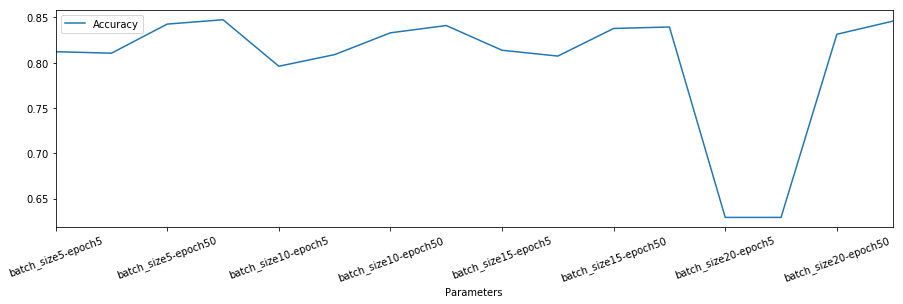

In [123]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line', rot=20)

In [124]:
# Printing the best parameter
ResultsData.sort_values(by='Accuracy', ascending=False).head(1)

,TrialNumber,Parameters,Accuracy
0,4,batch_size5-epoch100,0.847512


### Training the model using best parameters

In [138]:
classifier.fit(X_train,y_train, batch_size=5 , epochs=100, verbose=1)

Epoch 1/100
623/623 [==============================] - 0s - loss: 0.4185 - acc: 0.8347     
Epoch 2/100
623/623 [==============================] - 0s - loss: 0.4135 - acc: 0.8315     
Epoch 3/100
623/623 [==============================] - 0s - loss: 0.4152 - acc: 0.8347     
Epoch 4/100
623/623 [==============================] - 0s - loss: 0.4147 - acc: 0.8315     
Epoch 5/100
623/623 [==============================] - 0s - loss: 0.4143 - acc: 0.8347     
Epoch 6/100
623/623 [==============================] - 0s - loss: 0.4141 - acc: 0.8331     
Epoch 7/100
623/623 [==============================] - 0s - loss: 0.4099 - acc: 0.8363     
Epoch 8/100
623/623 [==============================] - 0s - loss: 0.4118 - acc: 0.8363     
Epoch 9/100
623/623 [==============================] - 0s - loss: 0.4133 - acc: 0.8331     
Epoch 10/100
623/623 [==============================] - 0s - loss: 0.4145 - acc: 0.8363     
Epoch 11/100
623/623 [==============================] - 0s - loss: 0.4111 - acc

### Generating the predictions on Testing Data

In [139]:
# Predictions on testing data
Predictions=classifier.predict(X_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

# Generating a data frame for analyzing the test data
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Survival']=y_test
TestingData['PredictedSurvivalProb']=Predictions

def probThreshold(inpProb):
    if inpProb>0.3:
        return(1)
    else:
        return(0)

TestingData['PredictedSurvival']=TestingData['PredictedSurvivalProb'].apply(probThreshold)
TestingData.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survival,PredictedSurvivalProb,PredictedSurvival
0,3.0,1.0,23.0,1.0,1.0,15.2458,1.0,0.0,0.0,1,0.249054,0
1,2.0,1.0,31.0,0.0,0.0,10.5000,0.0,0.0,1.0,0,0.161471,0
2,3.0,1.0,20.0,0.0,0.0,7.9250,0.0,0.0,1.0,0,0.094225,0
3,2.0,0.0,6.0,0.0,1.0,33.0000,0.0,0.0,1.0,1,0.791084,1
4,3.0,0.0,14.0,1.0,0.0,11.2417,1.0,0.0,0.0,1,0.791084,1


In [140]:
# Comparing a sample row from original data to confirm if the reverse transform has happend correctly
TitanicSurvivalDataNumeric[(TitanicSurvivalDataNumeric['Fare']==11.2417) & (TitanicSurvivalDataNumeric['Age']==14)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
39,1,3,0,14.0,1,0,11.2417,1,0,0


### Calculating the Accuracy on Testing Data

In [141]:
from sklearn import metrics
print(metrics.classification_report(TestingData['Survival'], TestingData['PredictedSurvival']))
print(metrics.confusion_matrix(TestingData['Survival'], TestingData['PredictedSurvival']))

             precision    recall  f1-score   support

          0       0.82      0.87      0.84       157
          1       0.80      0.74      0.77       111

avg / total       0.81      0.81      0.81       268

[[136  21]
 [ 29  82]]


## Sklearn GridSearchCV

In [39]:
# Function to generate Deep ANN model 
def make_classification_ann(Optimizer_Trial, Neurons_Trial):
    from keras.models import Sequential
    from keras.layers import Dense
    
    # Creating the classifier ANN model
    classifier = Sequential()
    classifier.add(Dense(units=Neurons_Trial, input_dim=9, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=Neurons_Trial, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer=Optimizer_Trial, loss='binary_crossentropy', metrics=['accuracy'])
            
    return classifier

In [40]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


Parameter_Trials={'batch_size':[10,20,30],
                      'epochs':[10,20],
                    'Optimizer_Trial':['adam', 'rmsprop'],
                  'Neurons_Trial': [5,10]
                 }


classifierModel=KerasClassifier(make_classification_ann, verbose=0)

In [41]:
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=classifierModel, param_grid=Parameter_Trials, scoring='f1', cv=5)

In [42]:
# Measuring how much time it took to find the best params
import time
StartTime=time.time()

# Running Grid Search for different paramenters
grid_search.fit(X_train,y_train, verbose=1)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/10
498/498 [==============================] - 5s - loss: 0.6906 - acc: 0.6205     
Epoch 2/10
498/498 [==============================] - 0s - loss: 0.6814 - acc: 0.6265     
Epoch 3/10
498/498 [==============================] - 0s - loss: 0.6565 - acc: 0.6265     
Epoch 4/10
498/498 [==============================] - 0s - loss: 0.6129 - acc: 0.6265     
Epoch 5/10
498/498 [==============================] - 0s - loss: 0.5744 - acc: 0.6265     
Epoch 6/10
498/498 [==============================] - 0s - loss: 0.5506 - acc: 0.6265     
Epoch 7/10
498/498 [==============================] - 0s - loss: 0.5358 - acc: 0.6265     
Epoch 8/10
498/498 [==============================] - 0s - loss: 0.5225 - acc: 0.7731     
Epoch 9/10
498/498 [==============================] - 0s - loss: 0.5116 - acc: 0.7992     
Epoch 10/10
498/498 [==============================] - 0s - loss: 0.5023 - acc: 0.8012     
Epoch 1/10
498/498 [==============================] - 4s - loss: 0.6909 - acc: 0.6285    

498/498 [==============================] - 0s - loss: 0.6124 - acc: 0.7851     
Epoch 9/10
498/498 [==============================] - 0s - loss: 0.5876 - acc: 0.7952     
Epoch 10/10
498/498 [==============================] - 0s - loss: 0.5628 - acc: 0.7972     
Epoch 1/10
499/499 [==============================] - 4s - loss: 0.6918 - acc: 0.6373     
Epoch 2/10
499/499 [==============================] - 0s - loss: 0.6879 - acc: 0.6373     
Epoch 3/10
499/499 [==============================] - 0s - loss: 0.6811 - acc: 0.6373     
Epoch 4/10
499/499 [==============================] - 0s - loss: 0.6685 - acc: 0.6373     
Epoch 5/10
499/499 [==============================] - 0s - loss: 0.6490 - acc: 0.6373     
Epoch 6/10
499/499 [==============================] - 0s - loss: 0.6238 - acc: 0.6373     
Epoch 7/10
499/499 [==============================] - 0s - loss: 0.5959 - acc: 0.6373     
Epoch 8/10
499/499 [==============================] - 0s - loss: 0.5734 - acc: 0.6373     
Epoch 9/1

498/498 [==============================] - 0s - loss: 0.6779 - acc: 0.6265     
Epoch 6/20
498/498 [==============================] - 0s - loss: 0.6700 - acc: 0.6265     
Epoch 7/20
498/498 [==============================] - 0s - loss: 0.6593 - acc: 0.6265     
Epoch 8/20
498/498 [==============================] - 0s - loss: 0.6444 - acc: 0.6265     
Epoch 9/20
498/498 [==============================] - 0s - loss: 0.6266 - acc: 0.6265     
Epoch 10/20
498/498 [==============================] - 0s - loss: 0.6050 - acc: 0.6265     
Epoch 11/20
498/498 [==============================] - 0s - loss: 0.5823 - acc: 0.6446     
Epoch 12/20
498/498 [==============================] - 0s - loss: 0.5613 - acc: 0.7048     
Epoch 13/20
498/498 [==============================] - 0s - loss: 0.5433 - acc: 0.7590     
Epoch 14/20
498/498 [==============================] - 0s - loss: 0.5284 - acc: 0.7871     
Epoch 15/20
498/498 [==============================] - 0s - loss: 0.5168 - acc: 0.7932     
Epoc

498/498 [==============================] - 0s - loss: 0.5366 - acc: 0.6365     
Epoch 13/20
498/498 [==============================] - 0s - loss: 0.5333 - acc: 0.7691     
Epoch 14/20
498/498 [==============================] - 0s - loss: 0.5308 - acc: 0.7791     
Epoch 15/20
498/498 [==============================] - 0s - loss: 0.5282 - acc: 0.7811     
Epoch 16/20
498/498 [==============================] - 0s - loss: 0.5260 - acc: 0.7851     
Epoch 17/20
498/498 [==============================] - 0s - loss: 0.5231 - acc: 0.7892     - ETA: 0s - loss: 0.6067 - acc:
Epoch 18/20
498/498 [==============================] - 0s - loss: 0.5215 - acc: 0.7871     
Epoch 19/20
498/498 [==============================] - 0s - loss: 0.5190 - acc: 0.7871     
Epoch 20/20
498/498 [==============================] - 0s - loss: 0.5171 - acc: 0.7912     
Epoch 1/20
498/498 [==============================] - 4s - loss: 0.6891 - acc: 0.6265     
Epoch 2/20
498/498 [==============================] - 0s - los

498/498 [==============================] - 0s - loss: 0.4938 - acc: 0.8092     
Epoch 19/20
498/498 [==============================] - 0s - loss: 0.4850 - acc: 0.8133     
Epoch 20/20
498/498 [==============================] - 0s - loss: 0.4775 - acc: 0.8173     
Epoch 1/20
499/499 [==============================] - 5s - loss: 0.6912 - acc: 0.6293     
Epoch 2/20
499/499 [==============================] - 0s - loss: 0.6882 - acc: 0.6373     
Epoch 3/20
499/499 [==============================] - 0s - loss: 0.6855 - acc: 0.6373     
Epoch 4/20
499/499 [==============================] - 0s - loss: 0.6825 - acc: 0.6373     
Epoch 5/20
499/499 [==============================] - 0s - loss: 0.6793 - acc: 0.6373     
Epoch 6/20
499/499 [==============================] - 0s - loss: 0.6761 - acc: 0.6373     
Epoch 7/20
499/499 [==============================] - 0s - loss: 0.6723 - acc: 0.6373     
Epoch 8/20
499/499 [==============================] - 0s - loss: 0.6680 - acc: 0.6453     
Epoch 9/

499/499 [==============================] - 0s - loss: 0.6700 - acc: 0.6493     
Epoch 8/10
499/499 [==============================] - 0s - loss: 0.6641 - acc: 0.6814     
Epoch 9/10
499/499 [==============================] - 0s - loss: 0.6578 - acc: 0.6954     - ETA: 0s - loss: 0.6587 - acc: 0.68
Epoch 10/10
499/499 [==============================] - 0s - loss: 0.6511 - acc: 0.7174     
Epoch 1/20
498/498 [==============================] - 4s - loss: 0.6914 - acc: 0.6084     
Epoch 2/20
498/498 [==============================] - 0s - loss: 0.6883 - acc: 0.6265     
Epoch 3/20
498/498 [==============================] - 0s - loss: 0.6844 - acc: 0.6265     
Epoch 4/20
498/498 [==============================] - 0s - loss: 0.6789 - acc: 0.6265     
Epoch 5/20
498/498 [==============================] - 0s - loss: 0.6717 - acc: 0.6265     
Epoch 6/20
498/498 [==============================] - 0s - loss: 0.6630 - acc: 0.6265     
Epoch 7/20
498/498 [==============================] - 0s - loss:

498/498 [==============================] - 0s - loss: 0.6174 - acc: 0.7269     
Epoch 4/20
498/498 [==============================] - 0s - loss: 0.5465 - acc: 0.7771     
Epoch 5/20
498/498 [==============================] - 0s - loss: 0.5023 - acc: 0.7871     
Epoch 6/20
498/498 [==============================] - 0s - loss: 0.4871 - acc: 0.7972     
Epoch 7/20
498/498 [==============================] - 0s - loss: 0.4777 - acc: 0.7912     
Epoch 8/20
498/498 [==============================] - 0s - loss: 0.4728 - acc: 0.7992     
Epoch 9/20
498/498 [==============================] - 0s - loss: 0.4690 - acc: 0.7912     
Epoch 10/20
498/498 [==============================] - 0s - loss: 0.4672 - acc: 0.7912     
Epoch 11/20
498/498 [==============================] - 0s - loss: 0.4641 - acc: 0.7952     
Epoch 12/20
498/498 [==============================] - 0s - loss: 0.4604 - acc: 0.7972     
Epoch 13/20
498/498 [==============================] - 0s - loss: 0.4578 - acc: 0.8012     
Epoch 

498/498 [==============================] - 0s - loss: 0.4615 - acc: 0.8012     
Epoch 11/20
498/498 [==============================] - 0s - loss: 0.4519 - acc: 0.8012     
Epoch 12/20
498/498 [==============================] - 0s - loss: 0.4456 - acc: 0.8012     
Epoch 13/20
498/498 [==============================] - 0s - loss: 0.4401 - acc: 0.8052     
Epoch 14/20
498/498 [==============================] - 0s - loss: 0.4351 - acc: 0.8112     
Epoch 15/20
498/498 [==============================] - 0s - loss: 0.4312 - acc: 0.8112     
Epoch 16/20
498/498 [==============================] - 0s - loss: 0.4286 - acc: 0.8133     
Epoch 17/20
498/498 [==============================] - 0s - loss: 0.4256 - acc: 0.8153     
Epoch 18/20
498/498 [==============================] - 0s - loss: 0.4239 - acc: 0.8153     
Epoch 19/20
498/498 [==============================] - 0s - loss: 0.4217 - acc: 0.8153     
Epoch 20/20
498/498 [==============================] - 0s - loss: 0.4199 - acc: 0.8173     


499/499 [==============================] - 0s - loss: 0.4275 - acc: 0.8277     
Epoch 18/20
499/499 [==============================] - 0s - loss: 0.4245 - acc: 0.8317     
Epoch 19/20
499/499 [==============================] - 0s - loss: 0.4232 - acc: 0.8357     
Epoch 20/20
499/499 [==============================] - 0s - loss: 0.4215 - acc: 0.8337     
Epoch 1/20
499/499 [==============================] - 5s - loss: 0.6923 - acc: 0.6032     
Epoch 2/20
499/499 [==============================] - ETA: 0s - loss: 0.6902 - acc: 0.630 - 0s - loss: 0.6899 - acc: 0.6192     
Epoch 3/20
499/499 [==============================] - 0s - loss: 0.6864 - acc: 0.6192     
Epoch 4/20
499/499 [==============================] - 0s - loss: 0.6795 - acc: 0.6413     
Epoch 5/20
499/499 [==============================] - 0s - loss: 0.6664 - acc: 0.6894     
Epoch 6/20
499/499 [==============================] - 0s - loss: 0.6468 - acc: 0.7415     
Epoch 7/20
499/499 [==============================] - 0s - l

498/498 [==============================] - 0s - loss: 0.4124 - acc: 0.8173     
Epoch 17/20
498/498 [==============================] - 0s - loss: 0.4091 - acc: 0.8173     
Epoch 18/20
498/498 [==============================] - 0s - loss: 0.4077 - acc: 0.8213     
Epoch 19/20
498/498 [==============================] - 0s - loss: 0.4058 - acc: 0.8213     
Epoch 20/20
498/498 [==============================] - 0s - loss: 0.4039 - acc: 0.8173     
Epoch 1/20
498/498 [==============================] - 5s - loss: 0.6879 - acc: 0.6386     
Epoch 2/20
498/498 [==============================] - 0s - loss: 0.6684 - acc: 0.6365     
Epoch 3/20
498/498 [==============================] - 0s - loss: 0.6316 - acc: 0.6365     
Epoch 4/20
498/498 [==============================] - 0s - loss: 0.5905 - acc: 0.6747     
Epoch 5/20
498/498 [==============================] - 0s - loss: 0.5597 - acc: 0.7269     
Epoch 6/20
498/498 [==============================] - 0s - loss: 0.5406 - acc: 0.7550     
Epoch 

498/498 [==============================] - 0s - loss: 0.6688 - acc: 0.6265     
Epoch 4/20
498/498 [==============================] - 0s - loss: 0.6497 - acc: 0.6265     
Epoch 5/20
498/498 [==============================] - 0s - loss: 0.6253 - acc: 0.6807     
Epoch 6/20
498/498 [==============================] - 0s - loss: 0.5985 - acc: 0.7610     
Epoch 7/20
498/498 [==============================] - 0s - loss: 0.5710 - acc: 0.7691     
Epoch 8/20
498/498 [==============================] - 0s - loss: 0.5456 - acc: 0.7791     
Epoch 9/20
498/498 [==============================] - 0s - loss: 0.5237 - acc: 0.7851     
Epoch 10/20
498/498 [==============================] - 0s - loss: 0.5048 - acc: 0.7831     
Epoch 11/20
498/498 [==============================] - 0s - loss: 0.4895 - acc: 0.8032     
Epoch 12/20
498/498 [==============================] - 0s - loss: 0.4765 - acc: 0.8012     
Epoch 13/20
498/498 [==============================] - 0s - loss: 0.4663 - acc: 0.8032     
Epoch 

499/499 [==============================] - 0s - loss: 0.5559 - acc: 0.7335     
Epoch 11/20
499/499 [==============================] - 0s - loss: 0.5421 - acc: 0.7555     
Epoch 12/20
499/499 [==============================] - 0s - loss: 0.5306 - acc: 0.7655     
Epoch 13/20
499/499 [==============================] - 0s - loss: 0.5206 - acc: 0.7735     
Epoch 14/20
499/499 [==============================] - 0s - loss: 0.5119 - acc: 0.8016     
Epoch 15/20
499/499 [==============================] - 0s - loss: 0.5040 - acc: 0.8196     
Epoch 16/20
499/499 [==============================] - 0s - loss: 0.4968 - acc: 0.8216     
Epoch 17/20
499/499 [==============================] - 0s - loss: 0.4908 - acc: 0.8297     
Epoch 18/20
499/499 [==============================] - 0s - loss: 0.4844 - acc: 0.8297     
Epoch 19/20
499/499 [==============================] - 0s - loss: 0.4793 - acc: 0.8337     
Epoch 20/20
499/499 [==============================] - 0s - loss: 0.4739 - acc: 0.8277     


499/499 [==============================] - 0s - loss: 0.4349 - acc: 0.8136     
Epoch 17/20
499/499 [==============================] - 0s - loss: 0.4311 - acc: 0.8136     
Epoch 18/20
499/499 [==============================] - 0s - loss: 0.4299 - acc: 0.8136     
Epoch 19/20
499/499 [==============================] - 0s - loss: 0.4265 - acc: 0.8156     
Epoch 20/20
499/499 [==============================] - 0s - loss: 0.4247 - acc: 0.8156     
Epoch 1/10
498/498 [==============================] - 6s - loss: 0.6909 - acc: 0.6225     
Epoch 2/10
498/498 [==============================] - 0s - loss: 0.6804 - acc: 0.6265     
Epoch 3/10
498/498 [==============================] - 0s - loss: 0.6466 - acc: 0.7028     
Epoch 4/10
498/498 [==============================] - 0s - loss: 0.5779 - acc: 0.7631     
Epoch 5/10
498/498 [==============================] - 0s - loss: 0.5110 - acc: 0.7952     
Epoch 6/10
498/498 [==============================] - 0s - loss: 0.4727 - acc: 0.8153     
Epoch 

498/498 [==============================] - 0s - loss: 0.6420 - acc: 0.6546     
Epoch 5/10
498/498 [==============================] - 0s - loss: 0.5936 - acc: 0.7450     
Epoch 6/10
498/498 [==============================] - 0s - loss: 0.5436 - acc: 0.7590     
Epoch 7/10
498/498 [==============================] - 0s - loss: 0.5100 - acc: 0.7871     
Epoch 8/10
498/498 [==============================] - 0s - loss: 0.4826 - acc: 0.7992     
Epoch 9/10
498/498 [==============================] - 0s - loss: 0.4637 - acc: 0.7972     
Epoch 10/10
498/498 [==============================] - 0s - loss: 0.4504 - acc: 0.8012     
Epoch 1/10
499/499 [==============================] - 8s - loss: 0.6910 - acc: 0.6453     
Epoch 2/10
499/499 [==============================] - 0s - loss: 0.6844 - acc: 0.6373     
Epoch 3/10
499/499 [==============================] - 0s - loss: 0.6697 - acc: 0.7054     
Epoch 4/10
499/499 [==============================] - 0s - loss: 0.6401 - acc: 0.7595     
Epoch 5/1

498/498 [==============================] - 10s - loss: 0.6861 - acc: 0.6245    
Epoch 2/20
498/498 [==============================] - 0s - loss: 0.6530 - acc: 0.6727     
Epoch 3/20
498/498 [==============================] - 0s - loss: 0.5924 - acc: 0.7671     
Epoch 4/20
498/498 [==============================] - 0s - loss: 0.5306 - acc: 0.8213     
Epoch 5/20
498/498 [==============================] - 0s - loss: 0.4918 - acc: 0.8193     
Epoch 6/20
498/498 [==============================] - 0s - loss: 0.4669 - acc: 0.8173     
Epoch 7/20
498/498 [==============================] - 0s - loss: 0.4494 - acc: 0.8153     
Epoch 8/20
498/498 [==============================] - 0s - loss: 0.4383 - acc: 0.8092     
Epoch 9/20
498/498 [==============================] - 0s - loss: 0.4299 - acc: 0.8072     
Epoch 10/20
498/498 [==============================] - 0s - loss: 0.4241 - acc: 0.8092     
Epoch 11/20
498/498 [==============================] - 0s - loss: 0.4195 - acc: 0.8153     
Epoch 12

498/498 [==============================] - 0s - loss: 0.4945 - acc: 0.7892     
Epoch 10/20
498/498 [==============================] - 0s - loss: 0.4854 - acc: 0.7972     
Epoch 11/20
498/498 [==============================] - 0s - loss: 0.4790 - acc: 0.7912     
Epoch 12/20
498/498 [==============================] - 0s - loss: 0.4747 - acc: 0.7912     
Epoch 13/20
498/498 [==============================] - 0s - loss: 0.4705 - acc: 0.7892     
Epoch 14/20
498/498 [==============================] - 0s - loss: 0.4676 - acc: 0.7912     
Epoch 15/20
498/498 [==============================] - 0s - loss: 0.4646 - acc: 0.7851     
Epoch 16/20
498/498 [==============================] - 0s - loss: 0.4622 - acc: 0.7892     
Epoch 17/20
498/498 [==============================] - 0s - loss: 0.4601 - acc: 0.7912     
Epoch 18/20
498/498 [==============================] - 0s - loss: 0.4578 - acc: 0.7912     
Epoch 19/20
498/498 [==============================] - 0s - loss: 0.4546 - acc: 0.7932     


498/498 [==============================] - 0s - loss: 0.4406 - acc: 0.8052     
Epoch 17/20
498/498 [==============================] - 0s - loss: 0.4367 - acc: 0.8092     
Epoch 18/20
498/498 [==============================] - 0s - loss: 0.4331 - acc: 0.8072     
Epoch 19/20
498/498 [==============================] - 0s - loss: 0.4304 - acc: 0.8052     
Epoch 20/20
498/498 [==============================] - 0s - loss: 0.4279 - acc: 0.8112     
Epoch 1/20
499/499 [==============================] - 11s - loss: 0.6901 - acc: 0.6253    
Epoch 2/20
499/499 [==============================] - 0s - loss: 0.6809 - acc: 0.6834     
Epoch 3/20
499/499 [==============================] - 0s - loss: 0.6654 - acc: 0.7495     
Epoch 4/20
499/499 [==============================] - 0s - loss: 0.6422 - acc: 0.7816     
Epoch 5/20
499/499 [==============================] - 0s - loss: 0.6134 - acc: 0.8096     
Epoch 6/20
499/499 [==============================] - 0s - loss: 0.5817 - acc: 0.8257     
Epoch 

In [43]:
grid_search.best_params_

{'Neurons_Trial': 20,
 'Optimizer_Trial': 'adam',
 'batch_size': 20,
 'epochs': 10}

In [44]:
grid_search.best_score_

0.7196664738144546